In [1]:
import numpy as np
from scipy.linalg import eig
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

### Step 1: The original differential equation
\[ x''' - 2x'' - 5x' + 6x = 0 \]

### Step 2: Convert to a first-order system
We use the substitutions:
- \( u1 = x \)
- \( u2 = x' \)
- \( u3 = x'' \)

The resulting system is:
\[ u1' = u2 \]
\[ u2' = u3 \]
\[ u3' = 2*u3 + 5*u2 - 6*u1 \]

### Step 3: Calculate the eigenvalues and eigenvectors

### Step 4: Explanation of the system in terms of the original problem
First-order differential equations system:
\[ u1' = u2 \]
\[ u2' = u3 \]
\[ u3' = 2*u3 + 5*u2 - 6*u1 \]

In [2]:
A = np.array([[0, 1, 0],
              [0, 0, 1],
              [-6, 5, 2]])

print("Matrix A of the first-order system:")
print(A)

eigenvalues, eigenvectors = eig(A)

print("\nEigenvalues of matrix A:")
for i, val in enumerate(eigenvalues):
    print(f"λ_{i+1} = {val.real:.4f}")

print("\nEigenvectors of matrix A (normalized):")
for i, vec in enumerate(eigenvectors.T):  # .T to iterate over columns (eigenvectors)
    print(f"\nEigenvector associated with λ_{i+1}:")
    print(vec.real)

print("\nFirst-order differential equations system:")
print("u1' = u2")
print("u2' = u3")
print("u3' = 2*u3 + 5*u2 - 6*u1")


Matrix A of the first-order system:
[[ 0  1  0]
 [ 0  0  1]
 [-6  5  2]]

Eigenvalues of matrix A:
λ_1 = 3.0000
λ_2 = 1.0000
λ_3 = -2.0000

Eigenvectors of matrix A (normalized):

Eigenvector associated with λ_1:
[0.10482848 0.31448545 0.94345635]

Eigenvector associated with λ_2:
[-0.57735027 -0.57735027 -0.57735027]

Eigenvector associated with λ_3:
[-0.21821789  0.43643578 -0.87287156]

First-order differential equations system:
u1' = u2
u2' = u3
u3' = 2*u3 + 5*u2 - 6*u1


## Plot

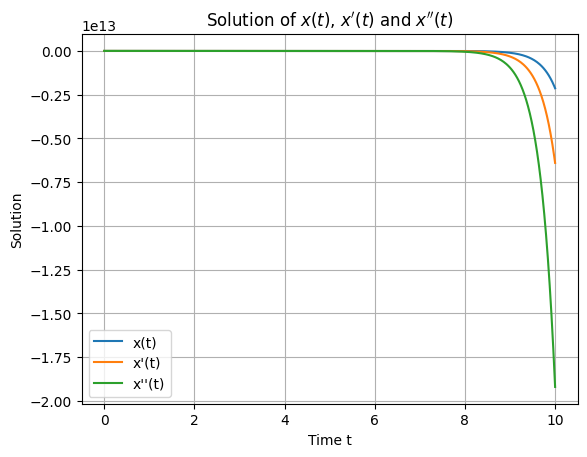

In [3]:
def system(t, u):
    u1, u2, u3 = u
    du1_dt = u2
    du2_dt = u3
    du3_dt = 2*u3 + 5*u2 - 6*u1
    return [du1_dt, du2_dt, du3_dt]

condiciones_iniciales = [1, 0, 0]
t_span = (0, 10)  # From t=0 to t=10
t_eval = np.linspace(t_span[0], t_span[1], 500)  # 500 points for the solution

solucion = solve_ivp(system, t_span, condiciones_iniciales, t_eval=t_eval)

plt.plot(solucion.t, solucion.y[0], label='x(t)')
plt.plot(solucion.t, solucion.y[1], label="x'(t)")
plt.plot(solucion.t, solucion.y[2], label="x''(t)")
plt.title('Solution of $x(t)$, $x\'(t)$ and $x\'\'(t)$')
plt.xlabel('Time t')
plt.ylabel('Solution')
plt.legend()
plt.grid(True)
plt.show()
